In [4]:
import pandas as pd
df = pd.read_csv (r'data.csv')

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt



In [40]:
# all mime data
mime = df[df['study'] == 'Mime']
# all ai data
ai = df[df['study'] == 'Bsc Artificial Intelligence']
# all proefpersoon data
proef = df[df['survey'] == 'p']
# all data
d = df[df['study'] != '-']
def load_data(df, columnname, target):
    return df[df[columnname] == target]

oplopend = load_data(d, 'survey', 'o')
aflopend = load_data(d, 'survey', 'a')
random = load_data(d, 'survey', 'r')
# print(mime, ai)



In [6]:
def first_choice(behaviour, df, row=df.shape[0]):
    counter = 0
    total = 0
    all_data = []
    correct_data = []
    value = df['understand_'+behaviour]
    cor = value.loc[df['firstchoice_'+behaviour] == df['intended_'+behaviour]]
    return value.values.tolist(), cor.values.tolist()

def occurence_fc(inp):
    occ= []
    for i in range(1,6):
        occ.append(inp.count(i))
    return occ

def likert_prepper(data, behaviourlist):
    likert_list = []
    for i in behaviourlist:
        data_m = first_choice(str(i), data)
        likert_list.append(occurence_fc(data_m[0]))
    return likert_list

def load_data(df, columnname, target):
    return df[df[columnname] == target]

def plot_likert(data,title):
    data.reverse()
    likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']
    dummy = pd.DataFrame(
        data,
        columns=["SD", "D", "N", "A", "SA"],
        index=["Realizing", "Pointing", "Thinking", "Being afraid", "Looking around", "Dancing", "Being sad", "Waving"])
#         index=["Waving", "Being sad", "Dancing", "Looking around", "Being afraid", "Thinking", "Pointing", "Realizing"])
#     print(data)
    middles = dummy[["SD", "D"]].sum(axis=1)+dummy["N"]*.5
    longest = middles.max()
    complete_longest = dummy.sum(axis=1).max()
    dummy.insert(0, '', (middles - longest).abs())

    dummy.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=True)
    z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
    z.set_zorder(-1)

    plt.ylabel('Behaviours')
    plt.xlabel('Occurences')
    plt.title(title)
    plt.legend(loc=4)
    plt.show()



In [16]:
first_choice('1', mime)
first_choice('1', ai)


print(mime, ai)
import scipy
from scipy import stats



   survey study             gender  understand_1  \
0       o  Mime             Female             4   
1       o  Mime               Male             3   
2       o  Mime  Prefer not to say             5   
3       o  Mime               Male             5   
4       o  Mime               Male             3   
10      a  Mime             Female             5   
12      a  Mime             Female             5   
14      a  Mime             Female             5   
17      a  Mime             Female             3   
18      a  Mime               Male             5   
19      r  Mime             Female             5   
20      r  Mime               Male             5   
21      r  Mime             Female             4   
22      r  Mime             Female             4   
23      r  Mime  Prefer not to say             3   
24      r  Mime               Male             5   

                                           describe_1  \
0                                Waving hi and/or bye   
1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [42]:


ail = likert_prepper(ai, behaviourlist)
mimel = likert_prepper(mime,behaviourlist)



print(ail)
print(mimel)

from scipy.stats import mannwhitneyu

behav1 = mannwhitneyu(ail[0], mimel[0])
behav2 = mannwhitneyu(ail[1], mimel[1])
behav3 = mannwhitneyu(ail[2], mimel[2])
behav4 = mannwhitneyu(ail[3], mimel[3])
behav5 = mannwhitneyu(ail[4], mimel[4])
behav6 = mannwhitneyu(ail[5], mimel[5])
behav7 = mannwhitneyu(ail[6], mimel[6])
behav8 = mannwhitneyu(ail[7], mimel[7])

# print(behav1)
# print(behav2)
# print(behav3)
# print(behav4)
# print(behav5)
# print(behav6)
# print(behav7)
# print(behav8)

def ttest(data1,data2,behaviourlist):
    data1 = likert_prepper(data1, [1,2,3,4,5,6,7,8])
    data2 = likert_prepper(data2, [1,2,3,4,5,6,7,8])
    out = []
    for i in behaviourlist:
        behav = ttest_ind(data1[i], data2[i])
        out.append(behav)
    return out

op_af = ttest(oplopend, aflopend, [i for i in range(8)])

ran_af = ttest(random, aflopend, [i for i in range(8)])

ran_op = ttest(random, oplopend, [i for i in range(8)])

print('oa:',op_af)
print('ra:', ran_af)
print('ro:', ran_op)
# scipy.stats.ttest_ind(mimel, ail, equal_var=False)

[[1, 0, 0, 9, 4], [1, 3, 8, 2, 0], [0, 0, 0, 3, 11], [0, 5, 4, 5, 0], [0, 2, 2, 7, 3], [3, 1, 3, 5, 2], [1, 5, 3, 2, 3], [4, 3, 4, 3, 0]]
[[0, 0, 4, 3, 9], [1, 1, 2, 8, 4], [0, 1, 2, 5, 8], [0, 2, 5, 8, 1], [1, 3, 1, 9, 2], [1, 2, 7, 6, 0], [0, 3, 5, 7, 1], [1, 4, 7, 4, 0]]
oa: [Ttest_indResult(statistic=0.14002800840280094, pvalue=0.8920991605586545), Ttest_indResult(statistic=0.196116135138184, pvalue=0.8494093684157503), Ttest_indResult(statistic=0.12803687993289595, pvalue=0.9012798773087503), Ttest_indResult(statistic=0.18731716231633874, pvalue=0.8560755194401928), Ttest_indResult(statistic=0.15617376188860602, pvalue=0.8797651207839103), Ttest_indResult(statistic=0.24999999999999994, pvalue=0.8088874454935352), Ttest_indResult(statistic=0.2182178902359923, pvalue=0.8327229151885773), Ttest_indResult(statistic=0.2182178902359923, pvalue=0.8327229151885773)]
ra: [Ttest_indResult(statistic=0.24902912254587622, pvalue=0.8096125780629935), Ttest_indResult(statistic=0.426401432711221,

In [36]:
from scipy.stats import ttest_ind

behav1 = ttest_ind(ail[0], mimel[0])
behav_1 = ttest_ind(mimel[0], ail[0])
behav2 = ttest_ind(ail[1], mimel[1])
behav3 = ttest_ind(ail[2], mimel[2])
behav4 = ttest_ind(ail[3], mimel[3])
behav5 = ttest_ind(ail[4], mimel[4])
behav6 = ttest_ind(ail[5], mimel[5])
behav7 = ttest_ind(ail[6], mimel[6])
behav8 = ttest_ind(ail[7], mimel[7])

print(behav1)
print(behav_1)
print(behav2)
print(behav3)
print(behav4)
print(behav5)
print(behav6)
print(behav7)
print(behav8)


Ttest_indResult(statistic=-0.16783627165933798, pvalue=0.8708773803679531)
Ttest_indResult(statistic=0.16783627165933798, pvalue=0.8708773803679531)
Ttest_indResult(statistic=-0.20851441405707496, pvalue=0.8400383271733086)
Ttest_indResult(statistic=-0.1547646465068275, pvalue=0.8808402330517436)
Ttest_indResult(statistic=-0.21442250696755916, pvalue=0.835582218953252)
Ttest_indResult(statistic=-0.21140656903267618, pvalue=0.8378561758268362)
Ttest_indResult(statistic=-0.259281489420866, pvalue=0.8019652679448664)
Ttest_indResult(statistic=-0.2773500981126148, pvalue=0.7885433926808222)
Ttest_indResult(statistic=-0.2773500981126148, pvalue=0.7885433926808222)


In [8]:
behaviourlist = [i for i in range(1,9)]


ai_likert = likert_prepper(ai, behaviourlist)
mime_likert = likert_prepper(mime, behaviourlist)
all_likert = likert_prepper(d, behaviourlist)


asc = load_data(d, 'survey', 'o')
desc = load_data(d, 'survey', 'a')
ran = load_data(d, 'survey', 'r')

asc_likert = likert_prepper(asc, behaviourlist)
desc_likert = likert_prepper(desc, behaviourlist)
ran_likert = likert_prepper(ran, behaviourlist)


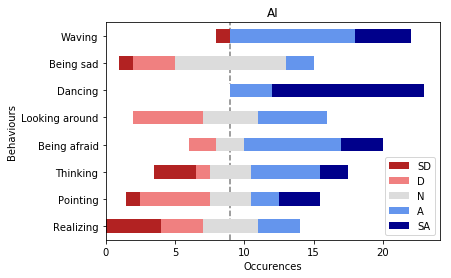

In [34]:
plot_likert(ai_likert, 'AI')

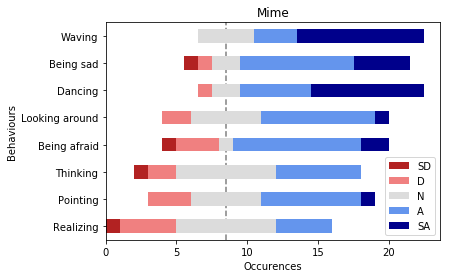

In [35]:
plot_likert(mime_likert, 'Mime')

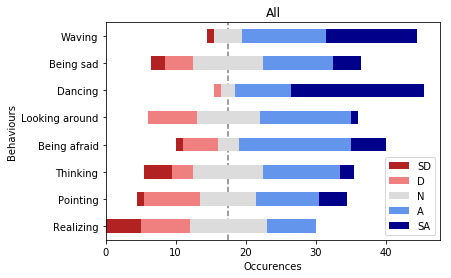

In [36]:
plot_likert(all_likert, 'All')

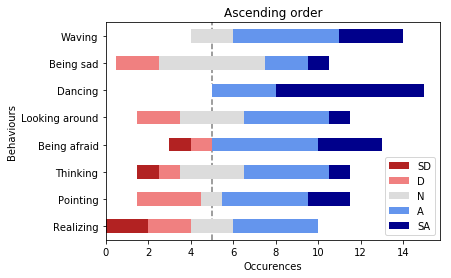

In [37]:
plot_likert(asc_likert, 'Ascending order')

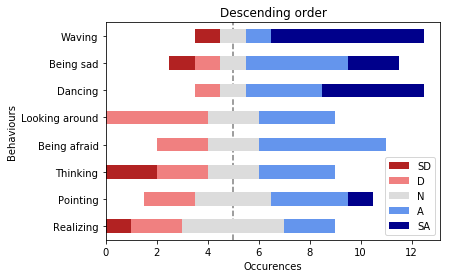

In [38]:
plot_likert(desc_likert, 'Descending order')

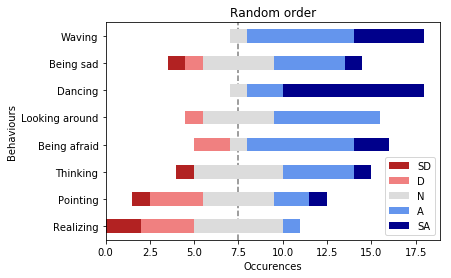

In [39]:
plot_likert(ran_likert, 'Random order')

In [5]:
dd_1 = first_choice('1', d)
dd_2 = first_choice('2', d)
dd_3 = first_choice('3', d)
dd_4 = first_choice('4', d)
dd_5 = first_choice('5', d)
dd_6 = first_choice('6', d)
dd_7 = first_choice('7', d)
dd_8 = first_choice('8', d)

ai_1 = first_choice('1', ai)
ai_2 = first_choice('2', ai)
ai_3 = first_choice('3', ai)
ai_4 = first_choice('4', ai)
ai_5 = first_choice('5', ai)
ai_6 = first_choice('6', ai)
ai_7 = first_choice('7', ai)
ai_8 = first_choice('8', ai)

mm_1 = first_choice('1', mime)
mm_2 = first_choice('2', mime)
mm_3 = first_choice('3', mime)
mm_4 = first_choice('4', mime)
mm_5 = first_choice('5', mime)
mm_6 = first_choice('6', mime)
mm_7 = first_choice('7', mime)
mm_8 = first_choice('8', mime)


a_1, a_c_1 = occurence_fc(ai_1[0]), occurence_fc(ai_1[1])
a_2, a_c_2 = occurence_fc(ai_2[0]), occurence_fc(ai_2[1])
a_3, a_c_3 = occurence_fc(ai_3[0]), occurence_fc(ai_3[1])
a_4, a_c_4 = occurence_fc(ai_4[0]), occurence_fc(ai_4[1])
a_5, a_c_5 = occurence_fc(ai_5[0]), occurence_fc(ai_5[1])
a_6, a_c_6 = occurence_fc(ai_6[0]), occurence_fc(ai_6[1])
a_7, a_c_7 = occurence_fc(ai_7[0]), occurence_fc(ai_7[1])
a_8, a_c_8 = occurence_fc(ai_8[0]), occurence_fc(ai_8[1])



m_1, m_c_1 = occurence_fc(mm_1[0]), occurence_fc(mm_1[1])
m_2, m_c_2 = occurence_fc(mm_2[0]), occurence_fc(mm_2[1])
m_3, m_c_3 = occurence_fc(mm_3[0]), occurence_fc(mm_3[1])
m_4, m_c_4 = occurence_fc(mm_4[0]), occurence_fc(mm_4[1])
m_5, m_c_5 = occurence_fc(mm_5[0]), occurence_fc(mm_5[1])
m_6, m_c_6 = occurence_fc(mm_6[0]), occurence_fc(mm_6[1])
m_7, m_c_7 = occurence_fc(mm_7[0]), occurence_fc(mm_7[1])
m_8, m_c_8 = occurence_fc(mm_8[0]), occurence_fc(mm_8[1])



d_1, d_c_1 = occurence_fc(dd_1[0]), occurence_fc(dd_1[1])
d_2, d_c_2 = occurence_fc(dd_2[0]), occurence_fc(dd_2[1])
d_3, d_c_3 = occurence_fc(dd_3[0]), occurence_fc(dd_3[1])
d_4, d_c_4 = occurence_fc(dd_4[0]), occurence_fc(dd_4[1])
d_5, d_c_5 = occurence_fc(dd_5[0]), occurence_fc(dd_5[1])
d_6, d_c_6 = occurence_fc(dd_6[0]), occurence_fc(dd_6[1])
d_7, d_c_7 = occurence_fc(dd_7[0]), occurence_fc(dd_7[1])
d_8, d_c_8 = occurence_fc(dd_8[0]), occurence_fc(dd_8[1])








In [32]:
def plot_likert(data,title):
    likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']
    dummy = pd.DataFrame(
        data,
        columns=["SD", "D", "N", "A", "SA"],
        index=["Waving", "Being sad", "Dancing", "Looking around", "Being afraid", "Thinking", "Pointing", "Realizing"])
    middles = dummy[["SD", "D"]].sum(axis=1)+dummy["N"]*.5
    longest = middles.max()
    complete_longest = dummy.sum(axis=1).max()
    dummy.insert(0, '', (middles - longest).abs())

    dummy.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=True)
    z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
    z.set_zorder(-1)

    plt.ylabel('Behaviours')
    plt.xlabel('Occurences')
    plt.title(title)
    plt.legend(loc=1)
    plt.show()

In [33]:
all_data = [d_1, d_2, d_3, d_4, d_5, d_6, d_7, d_8]
allc_data = [d_c_1,d_c_2,d_c_3,d_c_4,d_c_5,d_c_6,d_c_7,d_c_8]

mime_data = [m_1, m_2, m_3, m_4, m_5, m_6, m_7, m_8]
mimec_data = [m_c_1, m_c_2, m_c_3, m_c_4, m_c_5, m_c_6, m_c_7, m_c_8]

ai_data = [a_1, a_2, a_3, a_4, a_5, a_6, a_7, a_8]
aic_data = [a_c_1, a_c_2, a_c_3, a_c_4, a_c_5, a_c_6, a_c_7, a_c_8]

In [38]:

ai_data == likert_prepper(ai, [i for i in range(1,9)])

True

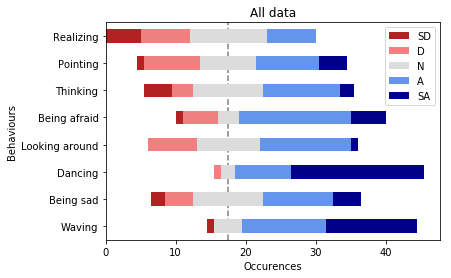

In [35]:
plot_likert(all_data, 'All data')

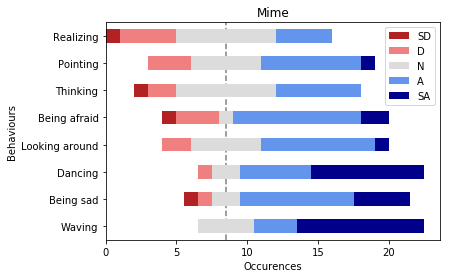

In [30]:
plot_likert(mime_data, 'Mime')

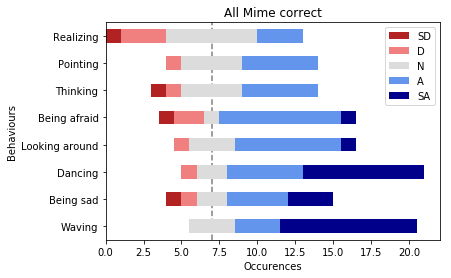

In [20]:
# plot_likert(mimec_data, 'Mime correct likert')

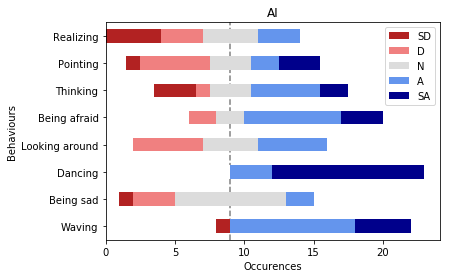

In [29]:
plot_likert(ai_data, 'AI')

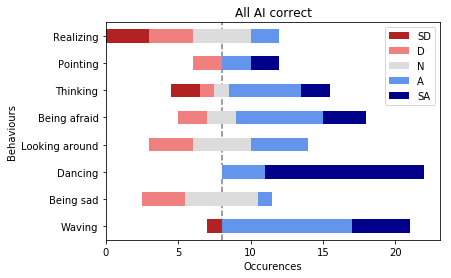

In [25]:
plot_likert(aic_data, 'All AI correct')

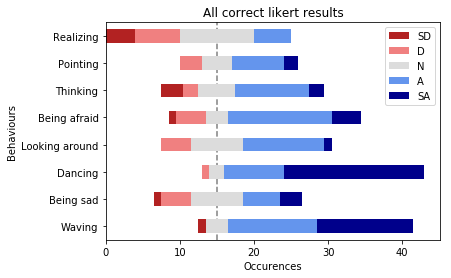

In [11]:
likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']
dummy = pd.DataFrame(
    [d_c_1,d_c_2,d_c_3,d_c_4,d_c_5,d_c_6,d_c_7,d_c_8],
    columns=["SD", "D", "N", "A", "SA"],
    index=["Waving", "Being sad", "Dancing", "Looking around", "Being afraid", "Thinking", "Pointing", "Realizing"])
middles = dummy[["SD", "D"]].sum(axis=1)+dummy["N"]*.5
longest = middles.max()
complete_longest = dummy.sum(axis=1).max()
dummy.insert(0, '', (middles - longest).abs())

dummy.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=True)
z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)

# plt.xlim(0, complete_longest)
# xvalues = range(0,complete_longest,10)
# xlabels = [str(x-longest) for x in xvalues]dddddddddddd
# plt.xticks(xvalues, xlabels)
plt.ylabel('Behaviours')
plt.xlabel('Occurences')
plt.title('All correct likert results')
plt.legend(loc=1)
plt.show()

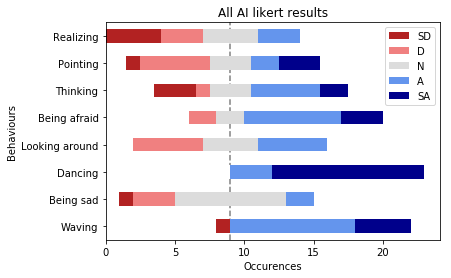

In [8]:
likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']
dummy = pd.DataFrame(
    [a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8],
    columns=["SD", "D", "N", "A", "SA"],
    index=["Waving", "Being sad", "Dancing", "Looking around", "Being afraid", "Thinking", "Pointing", "Realizing"])
middles = dummy[["SD", "D"]].sum(axis=1)+dummy["N"]*.5
longest = middles.max()
complete_longest = dummy.sum(axis=1).max()
dummy.insert(0, '', (middles - longest).abs())

dummy.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=True)
z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)

# plt.xlim(0, complete_longest)
# xvalues = range(0,complete_longest,10)
# xlabels = [str(x-longest) for x in xvalues]dddddddddddd
# plt.xticks(xvalues, xlabels)
plt.ylabel('Behaviours')
plt.xlabel('Occurences')
plt.legend(loc=1)
plt.title('All AI likert results')
plt.show()

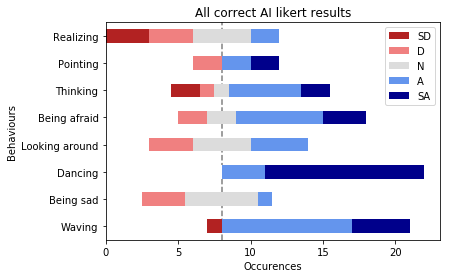

In [9]:
likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']
dummy = pd.DataFrame(
    [a_c_1,a_c_2,a_c_3,a_c_4,a_c_5,a_c_6,a_c_7,a_c_8],
    columns=["SD", "D", "N", "A", "SA"],
    index=["Waving", "Being sad", "Dancing", "Looking around", "Being afraid", "Thinking", "Pointing", "Realizing"])
middles = dummy[["SD", "D"]].sum(axis=1)+dummy["N"]*.5
longest = middles.max()
complete_longest = dummy.sum(axis=1).max()
dummy.insert(0, '', (middles - longest).abs())

dummy.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=True)
z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)

# plt.xlim(0, complete_longest)
# xvalues = range(0,complete_longest,10)
# xlabels = [str(x-longest) for x in xvalues]dddddddddddd
# plt.xticks(xvalues, xlabels)
plt.ylabel('Behaviours')
plt.xlabel('Occurences')
plt.legend(loc=1)
plt.title('All correct AI likert results')
plt.show()

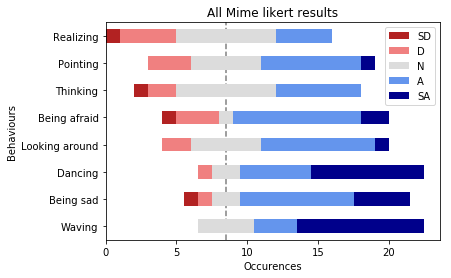

In [10]:
likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']
dummy = pd.DataFrame(
    [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8],
    columns=["SD", "D", "N", "A", "SA"],
    index=["Waving", "Being sad", "Dancing", "Looking around", "Being afraid", "Thinking", "Pointing", "Realizing"])
middles = dummy[["SD", "D"]].sum(axis=1)+dummy["N"]*.5
longest = middles.max()
complete_longest = dummy.sum(axis=1).max()
dummy.insert(0, '', (middles - longest).abs())

dummy.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=True)
z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)

# plt.xlim(0, complete_longest)
# xvalues = range(0,complete_longest,10)
# xlabels = [str(x-longest) for x in xvalues]dddddddddddd
# plt.xticks(xvalues, xlabels)
plt.ylabel('Behaviours')
plt.xlabel('Occurences')
plt.legend(loc=1)
plt.title('All Mime likert results')
plt.show()

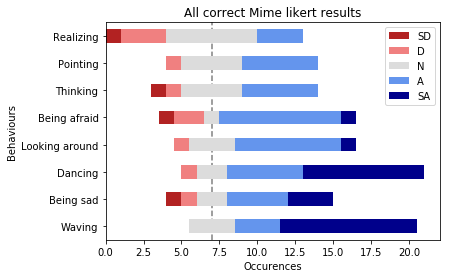

In [11]:
likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']
dummy = pd.DataFrame(
    [m_c_1,m_c_2,m_c_3,m_c_4,m_c_5,m_c_6,m_c_7,m_c_8],
    columns=["SD", "D", "N", "A", "SA"],
    index=["Waving", "Being sad", "Dancing", "Looking around", "Being afraid", "Thinking", "Pointing", "Realizing"])
middles = dummy[["SD", "D"]].sum(axis=1)+dummy["N"]*.5
longest = middles.max()
complete_longest = dummy.sum(axis=1).max()
dummy.insert(0, '', (middles - longest).abs())

dummy.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=True)
z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)

# plt.xlim(0, complete_longest)
# xvalues = range(0,complete_longest,10)
# xlabels = [str(x-longest) for x in xvalues]dddddddddddd
# plt.xticks(xvalues, xlabels)
plt.ylabel('Behaviours')
plt.xlabel('Occurences')
plt.legend(loc=1)
plt.title('All correct Mime likert results')
plt.show()

In [12]:

def occu(inp):
    occ= []
    for i in range(1,6):
        occ.append(inp.count(i))
    return occ

oc_1 = occu(c_data_1)
oc_2 = occu(c_data_2)
oc_3 = occu(c_data_3)
oc_4 = occu(c_data_4)
oc_5 = occu(c_data_5)
oc_6 = occu(c_data_6)
oc_7 = occu(c_data_7)
oc_8 = occu(c_data_8)

oci_1 = occu(i_data_1)
oci_2 = occu(i_data_2)
oci_3 = occu(i_data_3)
oci_4 = occu(i_data_4)
oci_5 = occu(i_data_5)
oci_6 = occu(i_data_6)
oci_7 = occu(i_data_7)
oci_8 = occu(i_data_8)


NameError: name 'c_data_1' is not defined

In [ ]:
likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']
dummy = pd.DataFrame(
    [oc_1,oc_2,oc_3,oc_4,oc_5,oc_6,oc_7,oc_8],
    columns=["SD", "D", "N", "A", "SA"],
    index=["Waving", "Being sad", "Dancing", "Looking around", "Being afraid", "Thinking", "Pointing", "Realizing"])
middles = dummy[["SD", "D"]].sum(axis=1)+dummy["N"]*.5
longest = middles.max()
complete_longest = dummy.sum(axis=1).max()
dummy.insert(0, '', (middles - longest).abs())

dummy.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=True)
z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)

plt.xlim(0, complete_longest)
xvalues = range(0,complete_longest,10)
xlabels = [str(x-longest) for x in xvalues]
plt.xticks(xvalues, xlabels)
plt.ylabel('Behaviours')
plt.xlabel('Occurences')
plt.legend(loc=3)
plt.show()

In [ ]:
print(complete_longest)
print(longest)

In [ ]:
likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']
dummy = pd.DataFrame(
    [oci_1,oci_2,oci_3,oci_4,oci_5,oci_6,oci_7,oci_8],
    columns=["SD", "D", "N", "A", "SA"],
    index=["Waving", "Being sad", "Dancing", "Looking around", "Being afraid", "Thinking", "Pointing", "Realizing"])
middles = dummy[["SD", "D"]].sum(axis=1)+dummy["N"]*.5
longest = middles.max()
complete_longest = dummy.sum(axis=1).max()
dummy.insert(0, '', (middles - longest).abs())

dummy.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=False)
z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)

plt.xlim(0, complete_longest)
xvalues = range(0,complete_longest,10)
xlabels = [str(x-longest) for x in xvalues]
plt.xticks(xvalues, xlabels)
plt.ylabel('Behaviours')
plt.xlabel('Occurences')
plt.legend(loc=3)
plt.show()

In [ ]:
# print(c_data_1)


# plt.scatter([1 for _ in range(len(c_data_1))], c_data_1)
# plt.scatter([2 for _ in range(len(c_data_2))], c_data_2)
# plt.scatter([3 for _ in range(len(c_data_3))], c_data_3)
# plt.scatter([4 for _ in range(len(c_data_4))], c_data_4)
# plt.scatter([5 for _ in range(len(c_data_5))], c_data_5)
# plt.scatter([6 for _ in range(len(c_data_6))], c_data_6)
# plt.scatter([7 for _ in range(len(c_data_7))], c_data_7)
# plt.scatter([8 for _ in range(len(c_data_8))], c_data_8)

In [13]:
import math


counter_1 = 0
total_1 = 0
c_data_1 = []
i_data_1 = []
for i in range(row):

    val = d['understand_1'].where(d['firstchoice_1'] == d['intended_1']).iloc[i]
    i_data_1.append(val)
    if not math.isnan(val):
        c_data_1.append(val)
        counter_1 +=1
        total_1 += int(val)

        
print('Behaviour 1 average first choice:', total_1/counter_1)



counter_2 = 0
total_2 = 0
c_data_2 = []
i_data_2 = []
for i in range(row):

    val = d['understand_2'].where(d['firstchoice_2'] == d['intended_2']).iloc[i]
    i_data_2.append(val)
    if not math.isnan(val):
        c_data_2.append(val)
        counter_2 +=1
        total_2 += int(val)

        
print('Behaviour 2 average first choice:', total_2/counter_2)



counter_3 = 0
total_3 = 0
c_data_3 = []
i_data_3 = []
for i in range(row):

    val = d['understand_3'].where(d['firstchoice_3'] == d['intended_3']).iloc[i]
    i_data_3.append(val)
    if not math.isnan(val):
        c_data_3.append(val)
        counter_3 +=1
        total_3 += int(val)

        
print('Behaviour 3 average first choice:', total_3/counter_3)



counter_4 = 0
total_4 = 0
c_data_4 = []
i_data_4 = []
for i in range(row):

    val = d['understand_4'].where(d['firstchoice_4'] == d['intended_4']).iloc[i]
    i_data_4.append(val)
    if not math.isnan(val):
        c_data_4.append(val)
        counter_4 +=1
        total_4 += int(val)

        
print('Behaviour 4 average first choice:', total_4/counter_4)







counter_5 = 0
total_5 = 0
c_data_5 = []
i_data_5 = []
for i in range(row):

    val = d['understand_5'].where(d['firstchoice_5'] == d['intended_5']).iloc[i]
    i_data_5.append(val)
    if not math.isnan(val):
        c_data_5.append(val)
        counter_5 +=1
        total_5 += int(val)

        
print('Behaviour 5 average first choice:', total_5/counter_5)







counter_6 = 0
total_6 = 0
c_data_6 = []
i_data_6 = []
for i in range(row):
    
    val = d['understand_6'].where(d['firstchoice_6'] == d['intended_6']).iloc[i]
    i_data_6.append(val)
    
    if not math.isnan(val):
        c_data_6.append(val)
        counter_6 +=1
        total_6 += int(val)

        
print('Behaviour 6 average first choice:', total_6/counter_6)








counter_7 = 0
total_7 = 0
c_data_7 = []
i_data_7 = []
for i in range(row):

    val = d['understand_7'].where(d['firstchoice_7'] == d['intended_7']).iloc[i]
    i_data_7.append(val)
    if not math.isnan(val):
        c_data_7.append(val)
        counter_7 +=1
        total_7 += int(val)

        
print('Behaviour 7 average first choice:', total_7/counter_7)




    
    


counter_8 = 0
total_8 = 0
c_data_8 = []
i_data_8 = []
for i in range(row):

    val = d['understand_8'].where(d['firstchoice_8'] == d['intended_8']).iloc[i]
    i_data_8.append(val)
    if not math.isnan(val):
        c_data_8.append(val)
        
        counter_8 +=1
        total_8 += int(val)

        
print('Behaviour 8 average first choice:', total_8/counter_8)



c_fc_1 = total_1 / counter_1
c_fc_2 = total_2 / counter_2
c_fc_3 = total_3 / counter_3
c_fc_4 = total_4 / counter_4
c_fc_5 = total_5 / counter_5
c_fc_6 = total_6 / counter_6
c_fc_7 = total_7 / counter_7
c_fc_8 = total_8 / counter_8

c_fc = [total_1 / counter_1, total_2 / counter_2,total_3 / counter_3,total_4 / counter_4,total_5 / counter_5,total_6 / counter_6, total_7 / counter_7, total_8 / counter_8]


NameError: name 'row' is not defined